<a href="https://colab.research.google.com/github/Satyam204/ML-Projects-Learning-/blob/main/Hand_Written_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
df=load_digits();

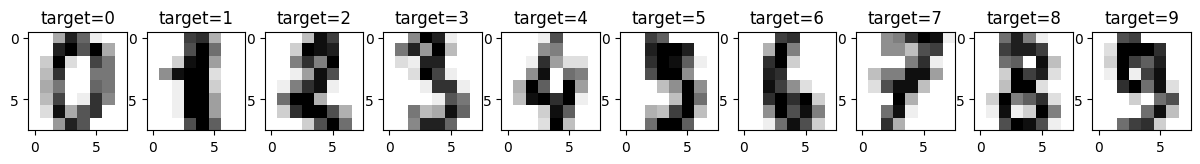

In [54]:
_, axes=plt.subplots(nrows=1,ncols=10,figsize=(15,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.imshow(image,cmap=plt.cm.gray_r)
    ax.set_title('target=%i' % label)


observing Dataframe

In [26]:
df.images.shape

(1797, 8, 8)

In [27]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

so we have 1797 image dataset.images stored in matrix form(8*8)

lets flatten the images (Flattening the images reduces the dimensionality of the data, resulting in a more efficient computation during the forward and backward propagation through the network. source-google search)

In [28]:
length=len(df.images);
flatten_data=df.images.reshape(length,-1)

In [29]:
flatten_data.shape

(1797, 64)

In [42]:
print(flatten_data[0].shape)
flatten_data[0]

(64,)


array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Scaling Image Data (Usually, we resize the input of a machine learning model mainly because models train faster on smaller images. An input image that is twice the size requires our network to learn from four times as many pixels, with more memory need and times that add up--google searh)

In [35]:
print(flatten_data.min());
print(flatten_data.max());

0.0
16.0


In [36]:
flatten_data=flatten_data/16

Train Test split

In [37]:
from re import X
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(flatten_data,df.target,test_size=0.2,random_state=25);

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

Model Selection and trainning

In [43]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

Prediction and verification of result i.e accuraccy score,report etc


In [44]:
y_pred=model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report;
accuracy_score(y_pred,y_test)

0.9638888888888889

In [47]:
confusion_matrix(y_pred,y_test)


array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  1,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 36,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1, 28,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 32]])

In [51]:
print(classification_report(y_pred,y_test));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.97      0.99        37
           2       1.00      1.00      1.00        33
           3       0.93      1.00      0.96        37
           4       1.00      0.93      0.96        43
           5       0.97      0.97      0.97        37
           6       0.94      1.00      0.97        33
           7       0.95      0.95      0.95        38
           8       0.90      0.90      0.90        31
           9       0.94      0.91      0.93        35

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

